In [1]:
import pandas as pd
import sys
from pyautomlib.preprocess import DataProcessor
from pyautomlib.config import PreprocessModel,RegressionModel
from pyautomlib.regression import Regression

In [2]:
df = pd.read_csv("datasets/pgd.csv")
df.head()

,MW,FaultType,Rjb,VS30,PGD
0,3.4,Ters Oblik Atımlı,11.99,423.11,0.005671
1,3.4,Ters Oblik Atımlı,85.59,347.00,0.000487
2,3.4,Ters Oblik Atımlı,213.84,361.00,0.000169
3,3.4,Ters Oblik Atımlı,72.56,461.00,0.000403
4,3.4,Ters Oblik Atımlı,85.21,505.00,0.000510


In [3]:
df.replace("Ters Oblik Atımlı", "Ters", inplace=True)
df.replace("Ters Eğim Atımlı", "Ters", inplace=True)
df.replace("Yanal Atımlı", "Yanal", inplace=True)
df.replace("Normal Oblik Atımlı", "Normal", inplace=True)
df.replace("Normal Eğim Atımlı", "Normal", inplace=True)

In [4]:
pm = PreprocessModel()
dp = DataProcessor(df,pm,"PGD")
df_processed = dp.process_data()
df_processed.head()

,MW,Rjb,VS30,PGD,FaultType_Ters,FaultType_Yanal
0,-1.093217,-1.331564,-0.114168,-0.285017,1,0
3,-1.093217,-0.106217,0.132284,-1.371056,1,0
17,-1.093217,1.717136,1.678512,-1.596179,1,0
18,-1.093217,-1.107817,-0.551525,-0.032324,1,0
23,-1.093217,0.200878,-0.168415,-1.178914,1,0


In [5]:
x_train, x_test, y_train, y_test = dp.split_data()

In [6]:
regressor = Regression(x_train,y_train,config.RegressionModel())
model = regressor.create_model()

Base Models....
Best 3 models: ['XGBoost', 'LightGBM', 'GBM']
Hyperparameter Optimization....
XGBoost best score : 0.969

LightGBM best score : 0.9677

GBM best score : 0.9689

R2: 0.9701532342315937


In [7]:
from sklearn.metrics import r2_score

y_predict = model.predict(x_test)
test_score = r2_score(y_test, y_predict)
print("test_score = ", test_score)

test_score =  0.9751471053935111


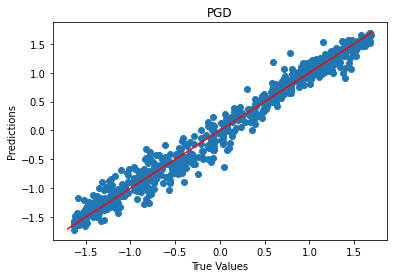

In [9]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_predict)
plt.plot([-1.7, 1.7], [-1.7, 1.7], color='red')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("PGD")
plt.show()
plt.close()

In [10]:
regressor.save_model("pgd_model")